# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


---

Dataset yang digunakan adalah dataset churn prediction yang diperoleh dari platform Kaggle dengan link berikut: https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [22]:
import os
import zipfile
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

---

Akan dilakukan load dataset langsung dari Kaggle

In [4]:
 # Upload kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhammadfathifarhat","key":"7db5203fc40607ba675837f473b53609"}'}

In [5]:
# Buat direktori .kaggle dan pindahkan credential
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
# download dataset dari link
!kaggle datasets download -d muhammadshahidazeem/customer-churn-dataset

Dataset URL: https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset
License(s): GPL-2.0
  0% 0.00/6.66M [00:00<?, ?B/s]
100% 6.66M/6.66M [00:00<00:00, 907MB/s]


In [7]:
# Ekstrak data
!unzip customer-churn-dataset.zip

Archive:  customer-churn-dataset.zip
  inflating: customer_churn_dataset-testing-master.csv  
  inflating: customer_churn_dataset-training-master.csv  


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [9]:
# melihat sekilas data
df = pd.read_csv('customer_churn_dataset-testing-master.csv')
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [11]:
# melihat info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [13]:
# melihat deskripsi statistik data
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,32187.500000,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,18583.317451,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,16094.250000,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,32187.500000,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,48280.750000,54.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,64374.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [14]:
# mengetahui dimensi data
df.shape

(64374, 12)

Data memiliki 12 kolom dengan 64374 baris

In [17]:
# cek null values
df.isnull().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,0
Contract Length,0
Total Spend,0


Dataset tidak memiliki null values

In [18]:
# cek duplicate data
df.duplicated().sum()

np.int64(0)

Dataset tidak memiliki data duplikat

In [19]:
# Pisahkan kolom berdasarkan tipe datanya
numerical_col = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_col = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerical columns:", numerical_col)
print("Categorical columns:", categorical_col)

Numerical columns: ['CustomerID', 'Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction', 'Churn']
Categorical columns: ['Gender', 'Subscription Type', 'Contract Length']


In [20]:
# cek outliers
outliers_iqr = {}

for col in numerical_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cari baris yang outlier
    outlier_mask = (df[col] < lower_bound) | (df[col] > upper_bound)
    outliers_iqr[col] = outlier_mask.sum()

# Tampilkan jumlah outlier per kolom
print("Jumlah outliers (IQR method) per kolom:")
print(outliers_iqr)

Jumlah outliers (IQR method) per kolom:
{'CustomerID': np.int64(0), 'Age': np.int64(0), 'Tenure': np.int64(0), 'Usage Frequency': np.int64(0), 'Support Calls': np.int64(0), 'Payment Delay': np.int64(0), 'Total Spend': np.int64(0), 'Last Interaction': np.int64(0), 'Churn': np.int64(0)}


Dataset tidak memiliki outliers

<ipython-input-21-c9294b89f094>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='Set2')


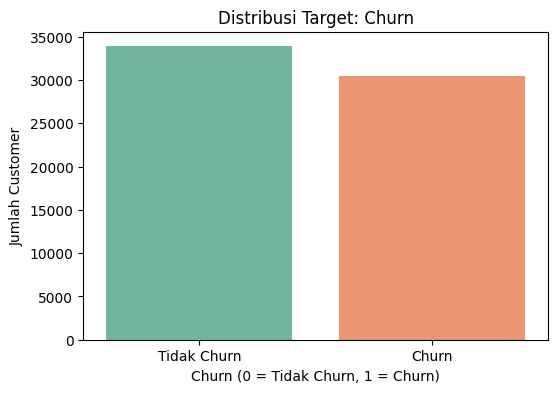

In [21]:
# cek distribusi Churn data
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn', palette='Set2')

plt.title('Distribusi Target: Churn')
plt.xlabel('Churn (0 = Tidak Churn, 1 = Churn)')
plt.ylabel('Jumlah Customer')
plt.xticks([0, 1], ['Tidak Churn', 'Churn'])
plt.show()

Distribusi data churn cukup berimbang

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [23]:
# encoding data kategorikal dengan ordinal encoder
categorical_cols = df.select_dtypes(include=['object']).columns

# Inisialisasi encoder
encoder = OrdinalEncoder()

# Transformasi dan simpan hasilnya ke DataFrame baru
df[categorical_cols] = encoder.fit_transform(df[categorical_cols])

df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,0.0,25,14,4,27,0.0,1.0,598,9,1
1,2,41,0.0,28,28,7,13,2.0,1.0,584,20,0
2,3,47,1.0,27,10,2,29,1.0,0.0,757,21,0
3,4,35,1.0,9,12,5,17,1.0,2.0,232,18,0
4,5,53,0.0,58,24,9,2,2.0,0.0,533,18,0


In [40]:
# drop CustomerID
df = df.drop(columns=['CustomerID'])

# splitting data
X = df.drop(columns = ["Churn"])
y = df["Churn"].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# scaling data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
# scaling df except customer id
df_preprocessed = df.copy()
columns_to_scale = [col for col in df_preprocessed.columns if col != 'customerID']

scaler = StandardScaler()
df_preprocessed[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [43]:
# menyimpan preprocessed dataset
df_preprocessed = pd.DataFrame(df_preprocessed, columns=df.columns)
df_preprocessed.to_csv('df_preprocessed.csv', index=False)